# 시각화(방사형그래프)

## 1. 필요한 패키지 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd #파일불러올 떄
import numpy as np
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt
import seaborn as sns #boxplot등 그래프 그릴 때 필요함
import os #디렉토리
from scipy import stats

import missingno as msno #결측치 확인할 수 있는 패키지
plt.style.use('seaborn')

import warnings #경고 무시하기
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트가 깨지는 것을 방지

%matplotlib inline

# 기본적인 모듈을 import 합니다. 
# mlp.rcParams['axes.unicode_minus'] = False 코드는 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.size'] = 36
sns.set(font= "NanumBarunGothic",
        rc = {"axes.unicode_minus" : False}
        )

In [ ]:
from math import pi

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#Colab에서 Drive Mounting 시키는 코드.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 데이터 불러오기

In [ ]:
park = pd.read_csv('/content/drive/Shareddrives/빅데이터/시설 데이터 정리/공원.csv')
shopping = pd.read_csv('/content/drive/Shareddrives/빅데이터/시설 데이터 정리/쇼핑센터.csv')
heritage = pd.read_csv('/content/drive/Shareddrives/빅데이터/시설 데이터 정리/유적지.csv')
sleeping = pd.read_csv('/content/drive/Shareddrives/빅데이터/시설 데이터 정리/숙박시설.csv')
cafe = pd.read_csv('/content/drive/Shareddrives/빅데이터/시설 데이터 정리/카페.csv')

## 강릉, 전주, 목포 숙박시설 상세비교

In [ ]:
sleeping

,Unnamed: 0,sido_nm,sgg_nm,mcate_nm
0,8,전라북도,전주시,모텔
1,32,충청남도,보령시,모텔
2,118,강원도,강릉시,펜션(관광지)
3,119,강원도,강릉시,모텔
4,120,강원도,강릉시,일반호텔
...,...,...,...,...
6167,92388,경상북도,경주시,게스트하우스
6168,92389,전라남도,목포시,여관
6169,92395,경상북도,경주시,펜션(관광지)
6170,92400,경상북도,경주시,일반호텔


In [ ]:
sookbak = sleeping.drop(["Unnamed: 0", "sido_nm"], axis = 1)

sookbak=sookbak.groupby(["sgg_nm", "mcate_nm"]).size().reset_index(name='count')

In [ ]:
print(sookbak)

   sgg_nm   mcate_nm  count
0     강릉시     게스트하우스    116
1     강릉시       대형스파      3
2     강릉시       레지던스      1
3     강릉시         모텔    292
4     강릉시         여관    157
5     강릉시  여인숙/민박/산장    455
6     강릉시      유스호스텔      2
7     강릉시       일반호텔     50
8     강릉시       특급호텔      3
9     강릉시    펜션(관광지)    827
10    경주시     게스트하우스    135
11    경주시       대형스파      5
12    경주시        리조트      2
13    경주시         모텔    272
14    경주시         여관    172
15    경주시  여인숙/민박/산장    112
16    경주시      유스호스텔     30
17    경주시       일반호텔     23
18    경주시       특급호텔      6
19    경주시    펜션(관광지)    832
20    목포시     게스트하우스     31
21    목포시         모텔    222
22    목포시         여관    199
23    목포시  여인숙/민박/산장     77
24    목포시       일반호텔     32
25    목포시    펜션(관광지)      5
26    보령시     게스트하우스      4
27    보령시       대형스파      2
28    보령시        리조트      1
29    보령시         모텔    152
30    보령시         여관     91
31    보령시  여인숙/민박/산장    228
32    보령시       일반호텔     19
33    보령시       특급호텔      1
34    보령시    펜션(관광지)

## 3. 시각화(방사형 그래프)
1) 강릉, 전주, 목포 숙박시설 상세비교  
2) 강릉, 전주, 목포 카페유형 상세비교  
3) 강릉, 전주, 목포 유적지 상세비교

### 1) 강릉, 전주, 목포 숙박시설 상세비교

In [ ]:
df1=pd.read_csv('sookbak.CSV', encoding='cp949')

In [ ]:
df1.rename(columns={'Unnamed: 0':'Character'}, inplace=True)

In [ ]:
df1

,Character,게스트하우스,모텔,여관,여인숙/민박/산장,일반호텔,펜션(관광지)
0,강릉시,116,292,157,455,50,827
1,전주시,296,333,175,74,51,135
2,목포시,31,222,199,77,32,5


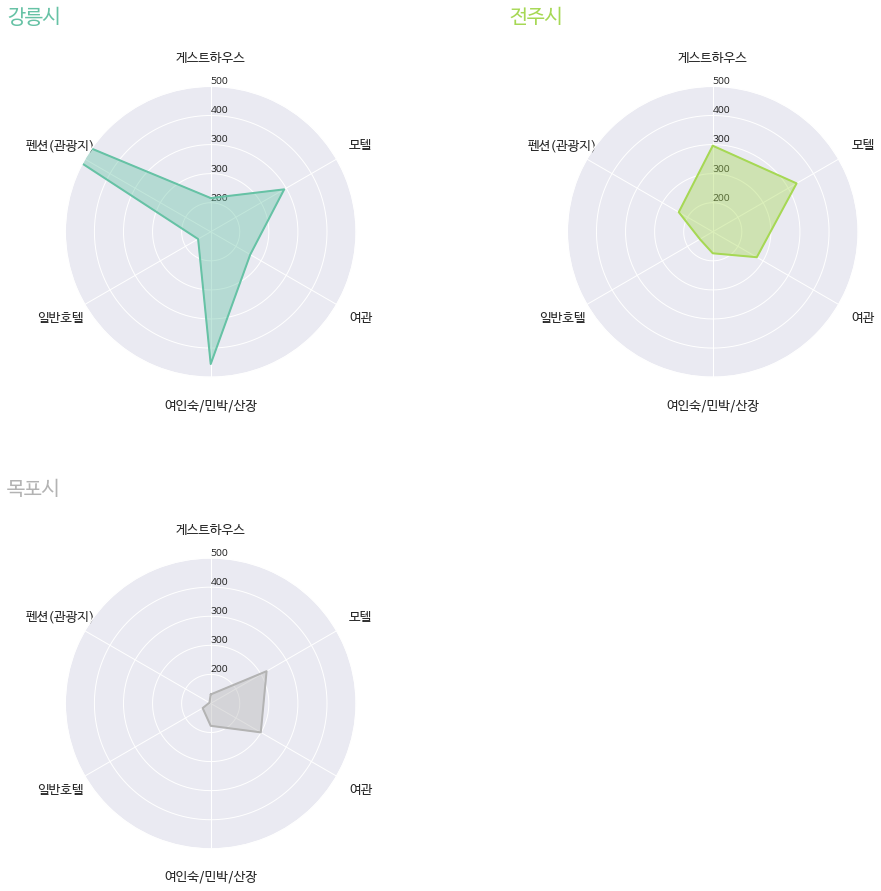

In [ ]:
## 따로 그리기
labels = df1.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df1.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df1.iterrows():
    color = my_palette(i)
    data = df1.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([100,200,300,400,500],['200','300','300','400','500'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,500)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Character, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

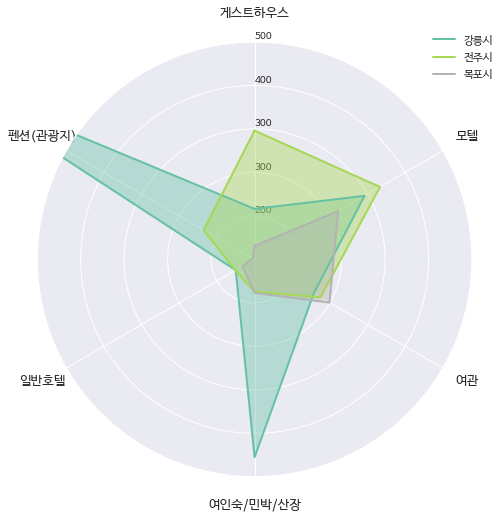

In [ ]:
## 한 그래프로 합치기
labels = df1.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df1.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df1.iterrows():
    color = my_palette(i)
    data = df1.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([100,200,300,400,500],['200','300','300','400','500'], fontsize=10) ## 반지름 축 눈금 설정
    plt.ylim(0,500)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.legend(loc=(0.9,0.9))
plt.show()

###2) 강릉, 전주, 목포 카페유형 상세비교

In [ ]:
df2=pd.read_csv('cafe.CSV', encoding='cp949')
df2.rename(columns={'Unnamed: 0':'Character'}, inplace=True)

In [ ]:
df2 #data

,Character,다방,떡집,스타벅스,전통찻집,카페(관광지),카페(도심)
0,강릉시,77,43,5,9,84,888
1,전주시,216,124,14,62,20,2150
2,목포시,87,53,5,13,2,677


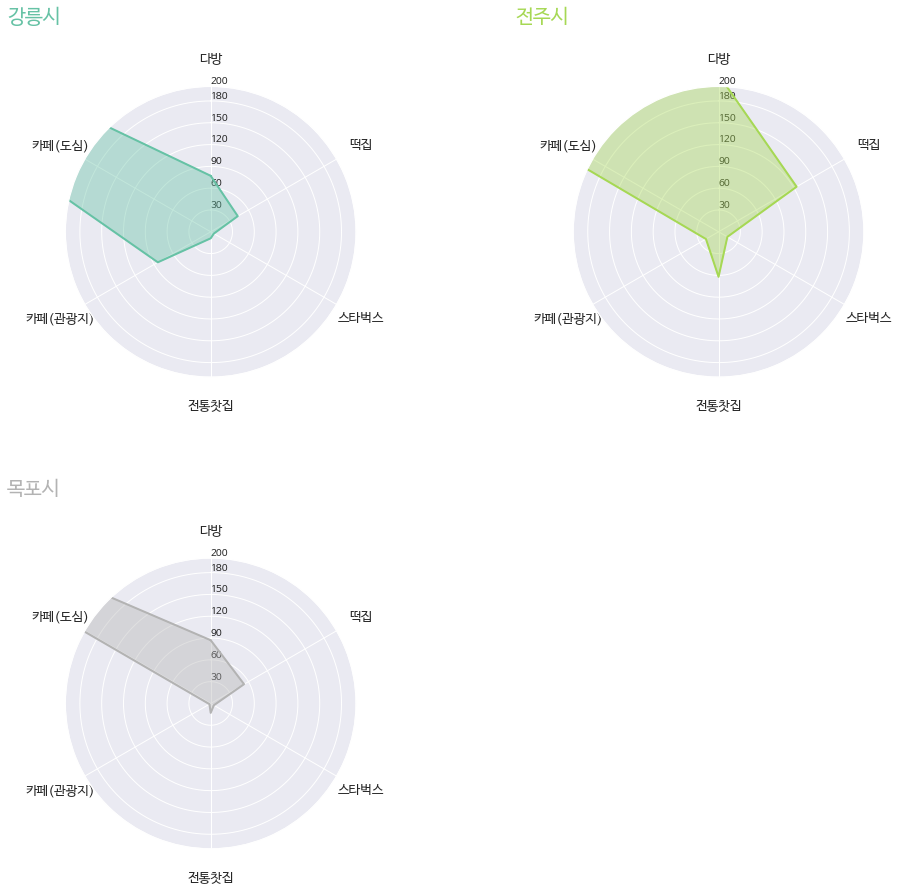

In [ ]:
## 따로 그리기
labels = df2.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df2.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df2.iterrows():
    color = my_palette(i)
    data = df2.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([30,60,90,120,150,180,200],['30','60','90','120','150','180','200'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,200)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Character, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

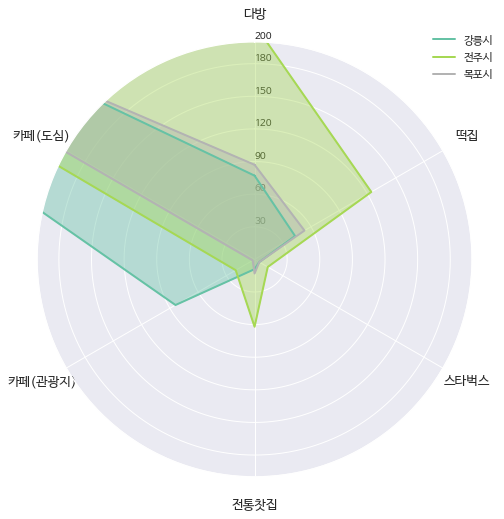

In [ ]:
## 한 그래프로 합치기
labels = df2.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df2.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df2.iterrows():
    color = my_palette(i)
    data = df2.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([30,60,90,120,150,180,200],['30','60','90','120','150','180','200'], fontsize=10) ## 반지름 축 눈금 설정
    plt.ylim(0,200)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.legend(loc=(0.9,0.9))
plt.show()

###3) 강릉, 전주, 목포 유적시설 비교

In [ ]:
df3=pd.read_csv('/travel.CSV', encoding='cp949')
df3

,Character,바위,보물,비/탑/문/각,유명사적/유적지,천연기념물,암자
0,강릉시,5,8,14,34,5,10
1,전주시,0,1,5,21,0,2
2,목포시,2,2,2,5,2,0


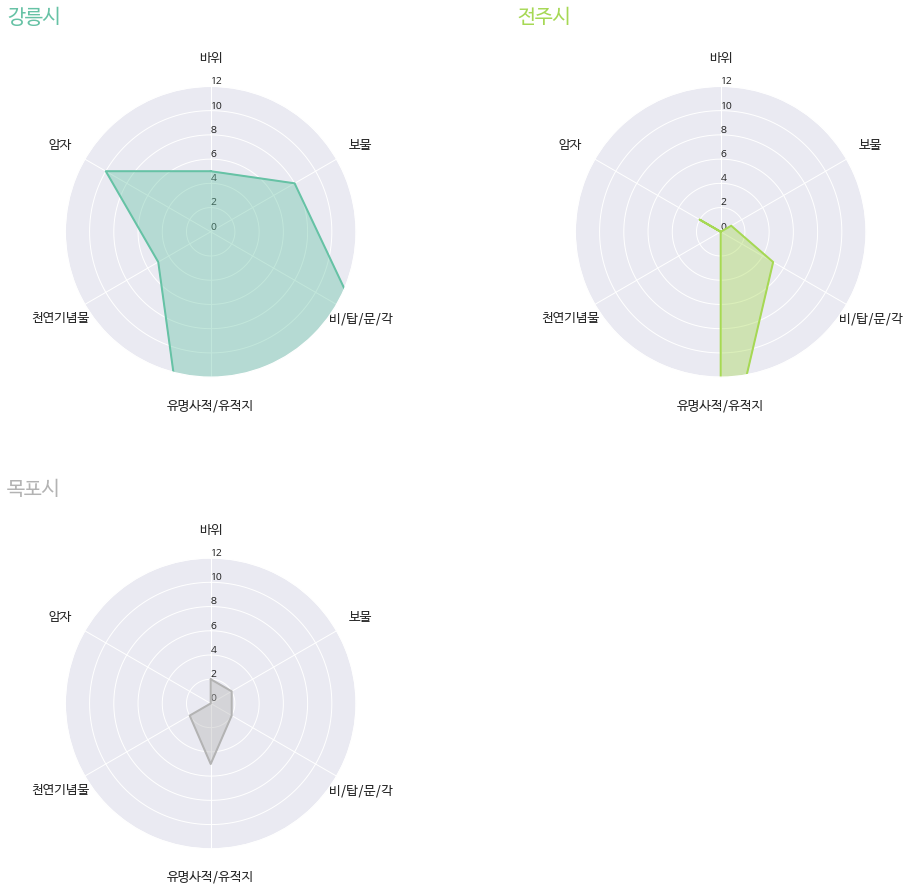

In [ ]:
## 따로 그리기
labels = df3.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df3.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10,12],['0','2','4','6','8','10','12'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,12)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Character, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

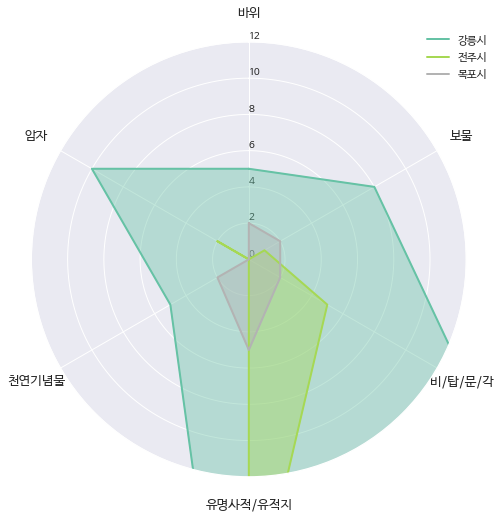

In [ ]:
## 한 그래프로 합치기
labels = df3.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df3.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Character').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10,12],['0','2','4','6','8','10','12'], fontsize=10) ## 반지름 축 눈금 설정
    plt.ylim(0,12)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Character) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.legend(loc=(0.9,0.9))
plt.show()